C:\Users\CCL\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


NameError: name 'sobel' is not defined

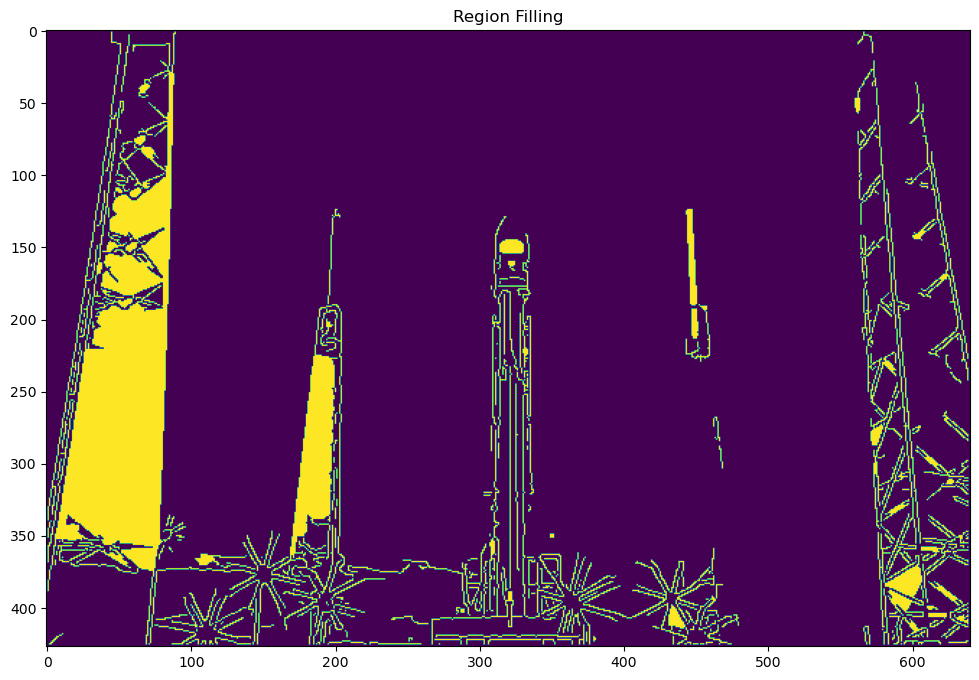

In [11]:
import numpy as np

import matplotlib.pyplot as plt

from skimage.feature import canny

from skimage import data,morphology

from skimage.color import rgb2gray

import scipy.ndimage as nd

plt.rcParams["figure.figsize"] = (12,8)

%matplotlib inline
 
# load images and convert grayscale

rocket = data.rocket()

rocket_wh = rgb2gray(rocket)
 
# apply edge segmentation
# plot canny edge detection

edges = canny(rocket_wh)

plt.imshow(edges, interpolation='gaussian')

plt.title('Canny detector')
 
# fill regions to perform edge segmentation

fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)

plt.title('Region Filling')
 
# Region Segmentation
# First we print the elevation map

elevation_map = sobel(rocket_wh)
plt.imshow(elevation_map)
 
# Since, the contrast difference is not much. Anyways we will perform it

markers = np.zeros_like(rocket_wh)

markers[rocket_wh < 0.1171875] = 1 # 30/255

markers[rocket_wh > 0.5859375] = 2 # 150/255
 
plt.imshow(markers)

plt.title('markers')
 
# Perform watershed region segmentation 

segmentation = morphology.watershed(elevation_map, markers)
 
plt.imshow(segmentation)

plt.title('Watershed segmentation')
 
# plot overlays and contour

segmentation = nd.binary_fill_holes(segmentation - 1)

label_rock, _ = nd.label(segmentation)
# overlay image with different labels

image_label_overlay = label2rgb(label_rock, image=rocket_wh)
 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh)

ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
ax2.imshow(image_label_overlay)
 

fig.subplots_adjust(**margins)

In [13]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [16]:
from PIL import Image

def extract_frames(gif_path, output_folder):
    try:
        gif = Image.open(gif_path)
        frames = []
        for i in range(gif.n_frames):
            gif.seek(i)
            frame = gif.copy()
            frames.append(frame)
            frame.save(f"{output_folder}/frame_{i}.png")  # Save each frame as PNG (or any desired format)
        print(f"{gif.n_frames} frames extracted successfully.")
    except Exception as e:
        print("Error:", e)

gif_path = "sun.gif"  
output_folder = "frames"  # Output folder to save the frames
extract_frames(gif_path, output_folder)


17 frames extracted successfully.


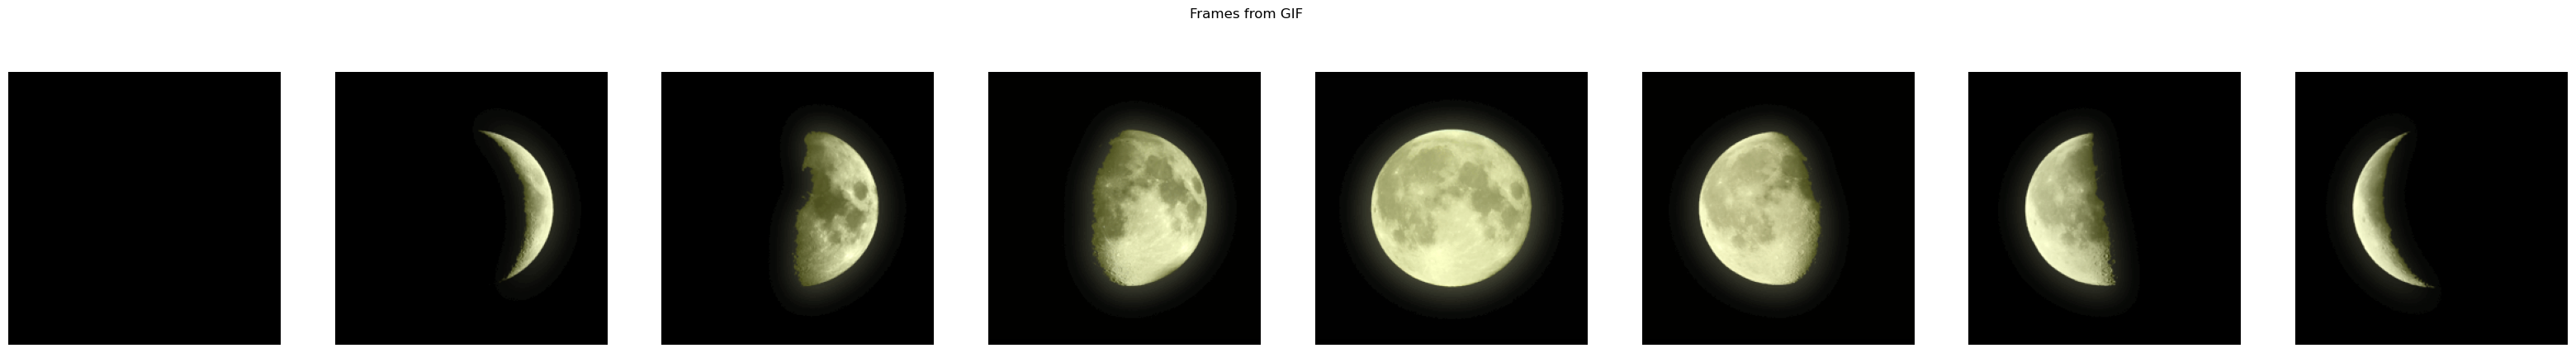

In [17]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

def extract_and_display_frames(gif_path):
    # Read GIF file
    gif = imageio.get_reader(gif_path)

    # Display each frame
    num_frames = len(gif)
    plt.figure(figsize=(5*num_frames, 5))  # Adjust the figure size as needed
    plt.suptitle('Frames from GIF')

    for i, frame in enumerate(gif):
        plt.subplot(1, num_frames, i + 1)  # Create subplot
        
        # Check the color mode of the frame
        if frame.ndim == 2:
            # Grayscale frame
            plt.imshow(frame, cmap='gray', extent=[0, 5, 0, 5])  # Display as grayscale
        else:
            # Color frame
            if frame.shape[2] == 4:
                # If alpha channel exists, remove it
                frame = frame[:, :, :3]
            plt.imshow(frame, extent=[0, 5, 0, 5])  # Display with original colors
        
        plt.axis('off')

    plt.show()

gif_path = "moon.gif" 
extract_and_display_frames(gif_path)


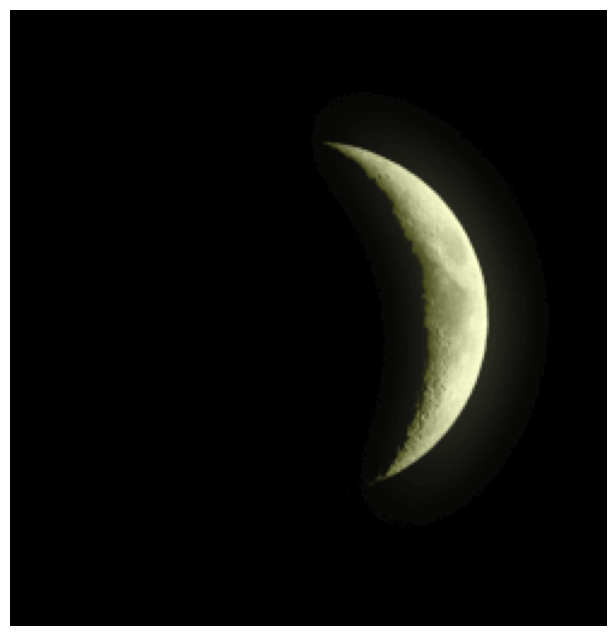

In [28]:
import imageio
import matplotlib.pyplot as plt

def display_frame(gif_path, frame_index):
    # Read GIF file
    gif = imageio.get_reader(gif_path)

    # Read the specific frame
    frame = gif.get_data(frame_index)

    # Display the frame
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

gif_path = "moon.gif"  # Replace with the path to your GIF file
frame_index = 1  # Index of the frame you want to display
display_frame(gif_path, frame_index)

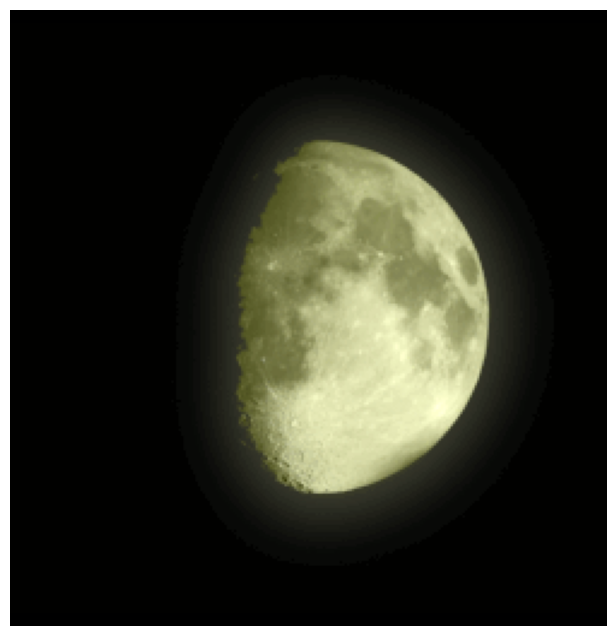

In [29]:
import imageio
import matplotlib.pyplot as plt
import cv2

def display_frame(gif_path, frame_index):
    # Read GIF file
    gif = imageio.get_reader(gif_path)

    # Read the specific frame
    frame = gif.get_data(frame_index)

    # Display the frame
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

gif_path = "moon.gif"
frame_index = 3  # Index of the frame you want to display
display_frame(gif_path, frame_index)

In [30]:
import numpy as np

def binary_to_indexed(binary_image):
    # Create an indexed image array
    indexed_image = np.zeros_like(binary_image, dtype=np.uint8)
    
    # Assign index 0 to black pixels and index 1 to white pixels
    indexed_image[binary_image == 0] = 0
    indexed_image[binary_image == 255] = 1
    
    return indexed_image

def indexed_to_binary(indexed_image, threshold=0.5):
    # Create a binary image array
    binary_image = np.zeros_like(indexed_image, dtype=np.uint8)
    
    # Set pixels with index <= threshold to black (0), and > threshold to white (255)
    binary_image[indexed_image <= threshold] = 0
    binary_image[indexed_image > threshold] = 255
    
    return binary_image

# Example binary image (replace this with your own binary image)
binary_image = np.array([[0, 255, 0],
                         [255, 255, 255],
                         [0, 0, 0]], dtype=np.uint8)

# Convert binary image to indexed image
indexed_image = binary_to_indexed(binary_image)

# Convert indexed image to binary image
restored_binary_image = indexed_to_binary(indexed_image)

# Display the results
print("Original Binary Image:")
print(binary_image)
print("\nIndexed Image:")
print(indexed_image)
print("\nRestored Binary Image:")
print(restored_binary_image)


Original Binary Image:
[[  0   0   0]
 [255 255 255]
 [  0   0   0]]

Indexed Image:
[[0 0 0]
 [1 1 1]
 [0 0 0]]

Restored Binary Image:
[[  0   0   0]
 [255 255 255]
 [  0   0   0]]


In [31]:
import numpy as np
import cv2

def matrix_to_grayscale_image(matrix):
    # Normalize the matrix values to be between 0 and 255
    normalized_matrix = cv2.normalize(matrix, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # Convert the matrix to a grayscale image
    grayscale_image = cv2.cvtColor(normalized_matrix, cv2.COLOR_GRAY2BGR)
    return grayscale_image

# Example matrix (replace this with your own matrix)
matrix = np.random.randint(0, 255, (100, 100), dtype=np.uint8)

# Convert the matrix to a grayscale image
grayscale_image = matrix_to_grayscale_image(matrix)

# Display the grayscale image
cv2.imshow('Grayscale Image', grayscale_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import cv2

def convert_to_uint8(image):
    # Convert the image to 8-bit unsigned integer
    uint8_image = cv2.convertScaleAbs(image)
    return uint8_image

def convert_to_uint16(image):
    # Convert the image to 16-bit unsigned integer
    uint16_image = cv2.normalize(image, None, 0, 65535, cv2.NORM_MINMAX, dtype=cv2.CV_16U)
    return uint16_image

# Read the image
image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)  

# Convert the image to 8-bit unsigned integer
uint8_image = convert_to_uint8(image)

# Convert the image to 16-bit unsigned integer
uint16_image = convert_to_uint16(image)

# Display the images
cv2.imshow('8-bit Unsigned Integer Image', uint8_image)
cv2.imshow('16-bit Unsigned Integer Image', uint16_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np

def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Add Gaussian noise to the given image.

    Parameters:
        image: numpy.ndarray
            Input image.
        mean: float, optional
            Mean (center) of the Gaussian distribution. Default is 0.
        sigma: float, optional
            Standard deviation (spread) of the Gaussian distribution. Default is 25.

    Returns:
        numpy.ndarray
            Image with added Gaussian noise.
    """
    # Generate Gaussian noise
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))

    # Add Gaussian noise to the image
    noisy_image = np.clip(image + gauss, 0, 255).astype(np.uint8)

    return noisy_image

# Read the original image
image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)  # Replace 'image.jpg' with your image file

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image)

# Display the original and noisy images
cv2.imshow('Original Image', image)
cv2.imshow('Noisy Image', noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()